In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [2]:
df.tail(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92014,2021-02-28 22:00:00,24.3,694.9515,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.6963,5.4848,62.955


In [3]:
df.describe(include='all')

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
count,92016,92016.000000,92016.000000,92016.000000,92016.000000
unique,92016,NaN,NaN,NaN,NaN
top,2010-09-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,231.696688,797.623357,6.016163,65.798356
std,NaN,4562.128748,613.520156,2.608116,213.144084
min,NaN,9.900000,-1596.810100,0.000000,-924.820000
25%,NaN,17.300000,417.119800,3.936900,31.543750
50%,NaN,21.900000,856.467925,5.165600,48.715000
75%,NaN,27.600000,1221.293675,8.023300,76.495000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df.nunique()

FullDate     92016
Tmax           328
SysLoad      91933
GasPrice      2128
ElecPrice    31855
dtype: int64

In [6]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df["FullDate"] = pd.to_datetime(df["FullDate"])
df.set_index("FullDate", inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
df1 = df.resample('D').sum()
df1.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [9]:
df1.tail()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495
2021-02-27,564.0,4932.88015,130.0800,488.980
2021-02-28,583.2,6675.05485,131.6352,-98.985


In [10]:
df1.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
ElecPrice,0.004748,0.170524,0.352420,1.000000


# 11

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0, 0.5, 'ElecPrice')

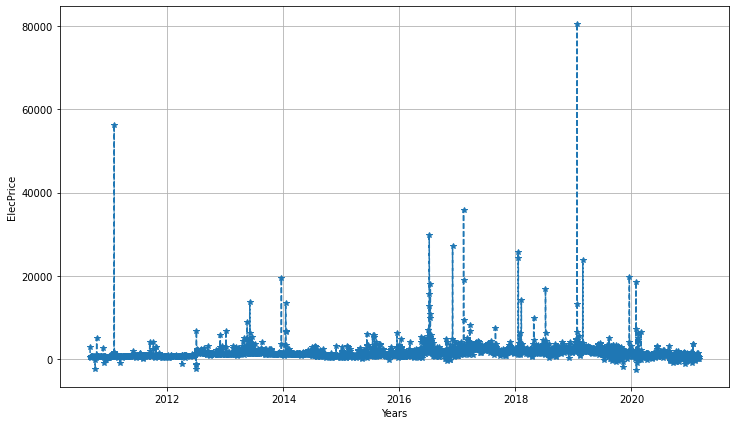

In [11]:
plt.figure(figsize=(12, 7))
plt.plot(df1.index, df1.ElecPrice, '--', marker= '*')
plt.grid()
plt.xlabel('Years')
plt.ylabel('ElecPrice')

# 12

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [12]:
from statsmodels.tsa.stattools import adfuller

In [82]:
result = adfuller(df1["SysLoad"], autolag='AIC')
print(f"p-value of SysLoad = {round(result[1], 6)}")

p-value of SysLoad = 0.004254


In [81]:
result1 = adfuller(df1["GasPrice"], autolag='AIC')
print(f"p-value of GasPrice = {round(result1[1], 6)}")

p-value of GasPrice = 0.045027


# 13

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [15]:
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {round(value, 4)}') 

Critial Values:
1%, -3.4321
Critial Values:
5%, -2.8623
Critial Values:
10%, -2.5672


## For Questions 14 - 16

In [16]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 131 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638458 sha256=b9e2d4411898e608f302a277410b82deadd1cf6dddb9eca761dde57883b77f36
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [17]:
from fbprophet import Prophet

In [22]:
df1.reset_index(inplace=True)

x = len(new_df.index)

df_uni = df1[["FullDate", "ElecPrice"]]
new_df = df_uni.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [23]:
new_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [24]:
model = Prophet()

In [25]:
x_train = new_df.head(2757)
x_test = new_df[-(x-2757):]

In [26]:
x_test.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


In [27]:
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = model.make_future_dataframe(periods=(x-2757), freq='D')
result_uni = model.predict(future)

In [29]:
result_uni.shape

(3834, 19)

In [30]:
result_uni.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1337.607527,3398.209384,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1303.677785,3528.684557,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1570.831047,3217.100451,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1825.341084,3048.427837,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2029.166127,2853.627788,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845


In [31]:
result_uni.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3829,2021-02-24,3567.126543,722.385385,6540.732007,1942.727014,5414.686162,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,528.387278,6826.483296,1942.343960,5418.025722,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,259.869947,6500.612631,1941.399164,5421.432876,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,275.064604,6059.000307,1940.454368,5425.211995,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610
3833,2021-02-28,3570.392819,-38.020319,5811.129073,1938.700819,5428.817816,-691.914985,-691.914985,-691.914985,-342.634443,-342.634443,-342.634443,-349.280542,-349.280542,-349.280542,0.0,0.0,0.0,2878.477834


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round((np.mean(np.abs((y_true - y_pred) / y_true)) * 100), 2)

# 14


Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [33]:
mean_absolute_percentage_error(x_test['y'], result_uni['yhat'][-(x-2757):])

549.48

# 15

What is the RMSE in 2 decimal places?

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = round(sqrt(mean_squared_error(x_test['y'], result_uni['yhat'][-(x-2757):])), 2)
rmse

3218.16

# 16

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

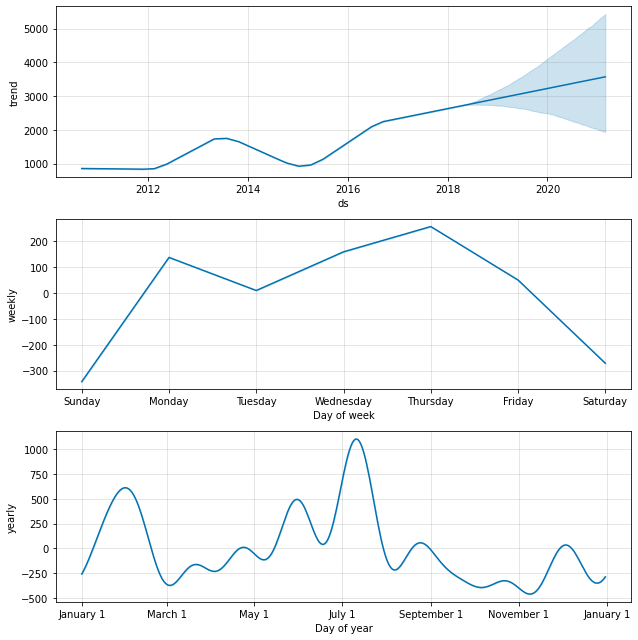

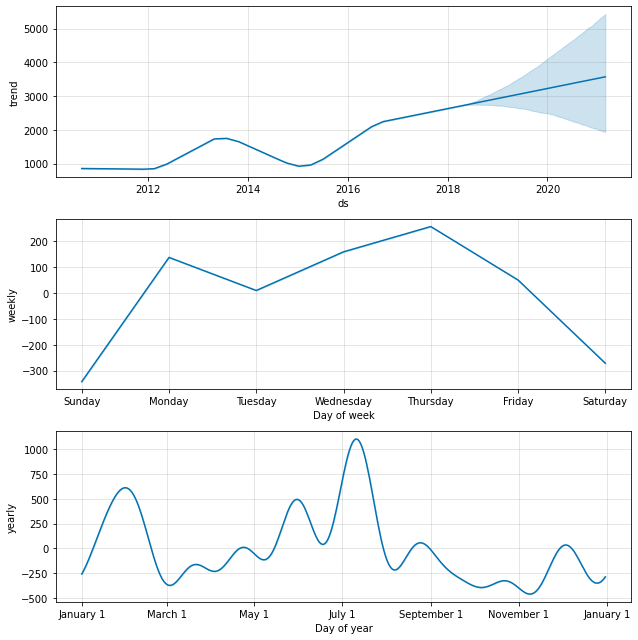

In [35]:
model.plot_components(result_uni)

## Highest at july

## For questions 17 - 19

In [36]:
df_mul_var = df1.rename(columns={"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3"})
df_mul_var.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [37]:
x_train_mul_var = df_mul_var.head(2757)
x_test_mul_var = df_mul_var[-(x-2757):]

In [38]:
x_train_mul_var.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [39]:
model_mul_var = Prophet()
model_mul_var.add_regressor('add1')
model_mul_var.add_regressor('add2')
model_mul_var.add_regressor('add3')

In [40]:
model_mul_var.fit(x_train_mul_var)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future_mul_var = model_mul_var.make_future_dataframe(periods=(x-2757),freq='D')
future_mul_var['add1'] = df_mul_var['add1'].values
future_mul_var['add2'] = df_mul_var['add2'].values
future_mul_var['add3'] = df_mul_var['add3'].values
result_mul_var= model_mul_var.predict(future_mul_var)

In [42]:
result_mul_var.shape

(3834, 31)

In [43]:
result_mul_var.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,981.533196,-545.297742,3586.966304,981.533196,981.533196,1038.685076,1038.685076,1038.685076,0.252403,...,42.515562,42.515562,42.515562,-4.132072,-4.132072,-4.132072,0.0,0.0,0.0,1503.264751
1,2010-09-02,982.087614,-568.222159,3639.711626,982.087614,982.087614,889.475204,889.475204,889.475204,0.253271,...,145.604343,145.604343,145.604343,-7.007355,-7.007355,-7.007355,0.0,0.0,0.0,1454.823664
2,2010-09-03,982.642032,-519.152585,3926.441608,982.642032,982.642032,1044.302291,1044.302291,1044.302291,0.246976,...,-44.332801,-44.332801,-44.332801,-9.942955,-9.942955,-9.942955,0.0,0.0,0.0,1684.281982
3,2010-09-04,983.196451,-1366.110640,3056.219251,983.196451,983.196451,706.996565,706.996565,706.996565,0.256961,...,-117.513591,-117.513591,-117.513591,-12.669044,-12.669044,-12.669044,0.0,0.0,0.0,899.300617
4,2010-09-05,983.750869,-847.209985,3535.325215,983.750869,983.750869,705.503845,705.503845,705.503845,0.254356,...,-69.467438,-69.467438,-69.467438,-14.943022,-14.943022,-14.943022,0.0,0.0,0.0,1316.465049


# 17


Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [44]:
mean_absolute_percentage_error(x_test_mul_var['y'], result_mul_var['yhat'][-(x-2757):])

231.28

# 18


What is the RMSE in 2 decimal places?

In [45]:
rmse = round(sqrt(mean_squared_error(x_test_mul_var['y'], result_mul_var['yhat'][-(x-2757):])), 2)
rmse

2706.92

# 19


If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

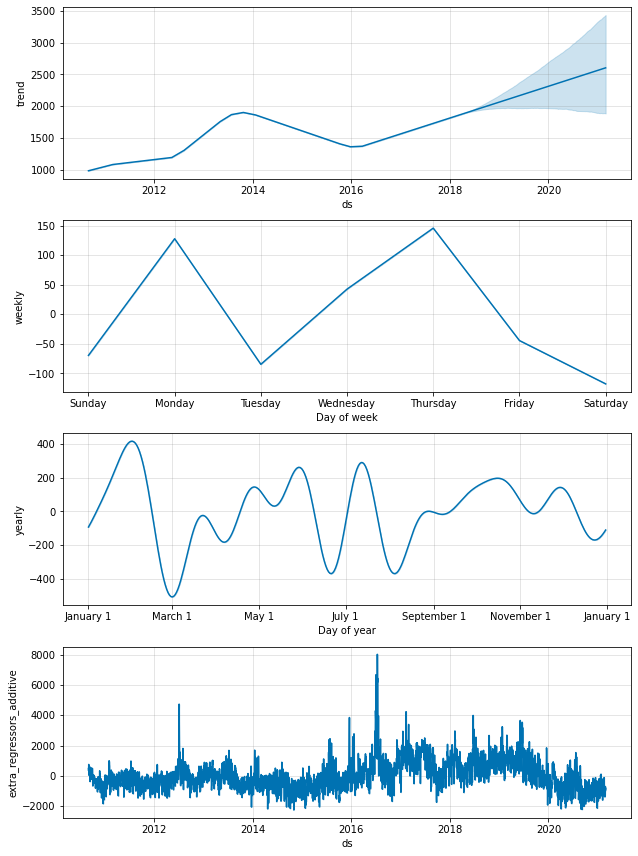

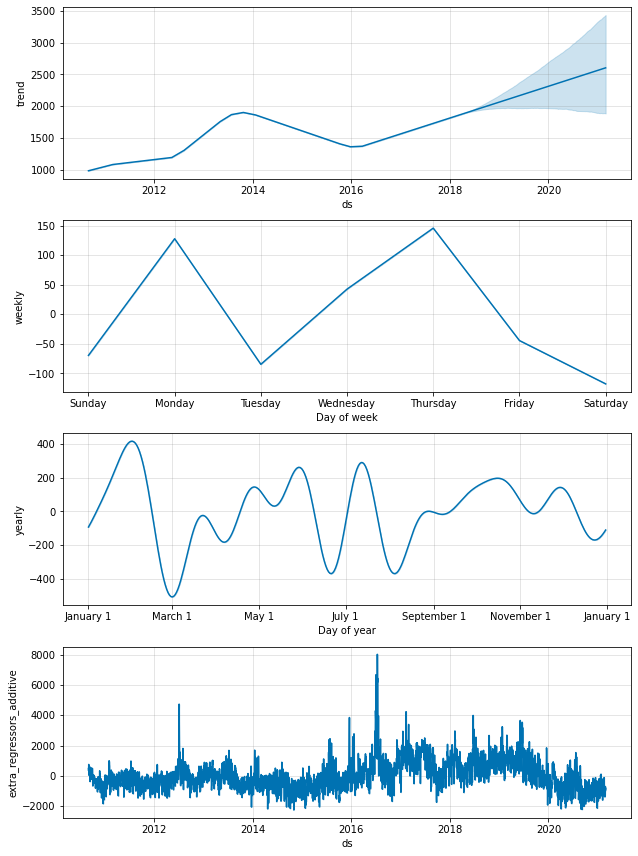

In [46]:
model_mul_var.plot_components(result_mul_var)

## Highest at Thursday

## For question 20

# 20


Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [49]:
df_mul_var_2 = df1.rename(columns={"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3"})
df_mul_var_2.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [51]:
#dropping Tmax / add2 for this case
new_df_2 = df_mul_var_2.drop(['add2'], axis=1)
new_df_2.head()

,index,ds,add1,add3,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [69]:
x_train_mul_var_2 = new_df_2.head(2757)
x_test_mul_var_2 = new_df_2[-(x-2757):]

In [70]:
x_train_mul_var_2.head()

,index,ds,add1,add3,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [71]:
model_mul_var_2 = Prophet()
model_mul_var_2.add_regressor('add1')
model_mul_var_2.add_regressor('add3')

In [72]:
model_mul_var_2.fit(x_train_mul_var_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
future_mul_var_2 = model_mul_var_2.make_future_dataframe(periods=(x-2757),freq='D')
future_mul_var_2['add1'] = new_df_2['add1'].values
future_mul_var_2['add3'] = new_df_2['add3'].values
result_mul_var_2= model_mul_var_2.predict(future_mul_var_2)

In [74]:
result_mul_var_2.shape

(3834, 28)

In [75]:
result_mul_var_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,982.887644,-632.155440,3637.888368,982.887644,982.887644,1038.715825,1038.715825,1038.715825,-555.696887,...,42.767881,42.767881,42.767881,-3.963670,-3.963670,-3.963670,0.0,0.0,0.0,1504.710793
1,2010-09-02,983.504110,-752.552869,3672.194486,983.504110,983.504110,889.501536,889.501536,889.501536,-555.696887,...,145.302341,145.302341,145.302341,-6.859202,-6.859202,-6.859202,0.0,0.0,0.0,1455.751898
2,2010-09-03,984.120576,-586.545753,4007.429267,984.120576,984.120576,1044.333207,1044.333207,1044.333207,-288.689395,...,-44.086683,-44.086683,-44.086683,-9.807052,-9.807052,-9.807052,0.0,0.0,0.0,1685.870653
3,2010-09-04,984.737042,-1263.842347,3267.944208,984.737042,984.737042,707.017495,707.017495,707.017495,-661.094581,...,-117.847877,-117.847877,-117.847877,-12.537108,-12.537108,-12.537108,0.0,0.0,0.0,900.274970
4,2010-09-05,985.353508,-727.746857,3614.133254,985.353508,985.353508,705.524731,705.524731,705.524731,-288.689395,...,-69.265132,-69.265132,-69.265132,-14.806755,-14.806755,-14.806755,0.0,0.0,0.0,1318.116957


In [76]:
mean_absolute_percentage_error(x_test_mul_var_2['y'], result_mul_var_2['yhat'][-(x-2757):])

233.72